In [198]:
!pip install sidetable
# Serve para mostrar missing values e valores categoricos de uma maneira mais rápida.
!pip install pandas-profiling==3.3.0
# o pandas profiling seria um auto EDA faz uma análise exploratória.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
#seaborn e matplolip para visualização de dados.
import sidetable
import pandas_profiling
import missingno as msno
# facilita a plotagem de dados faltantes
from ipywidgets import interact, widgets
# mostrar de forma interativa algumas funcionalidades
from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform
#Esses dois ultimos são bibliotecas de teste

In [200]:
#Configurando um padrão de layout de figura. Customização dos gráficos padrão.
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [201]:
def list_attributes(obj):
  """ Lista atributos e funções de um objeto"""
  return [attr for attr in obj.___dir___() if not attr.starswith(' ')]

In [202]:
# Leitura de um dataset famoso chamado titanic
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [203]:
# Essa função não existe por padrão apenas depois que é feito a importação da biblioteca pandas.profile
# Vai trazer um relátorio com várias informações. 
df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

#Valores duplicados

In [204]:
#Identificar valores duplicados
df[df.duplicated(keep=False)]
#esse é um metodo do pandas que já retorna os valores duplicados, mostrando se a linha está ou não duplicada.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [205]:
#Identificar quantos valores duplicados há em cada duplicata.
(
  df
  .groupby(df.columns.tolist(), dropna=False)
  .size()
  .to_frame('n_duplicates')
  .query('n_duplicates>1')
  .sort_values('n_duplicates',ascending=False)
  .head(5)
)

n_duplicates
survived pclass sex    age sibsp parch fare   embarked class  who   adult_male deck embark_town alive alone              
0        3      male   NaN 0     0     7.8958 S        Third  man   True       NaN  Southampton no    True             13
                                       8.0500 S        Third  man   True       NaN  Southampton no    True             12
                                       7.7500 Q        Third  man   True       NaN  Queenstown  no    True              8
1        3      female NaN 0     0     7.7500 Q        Third  woman False      NaN  Queenstown  yes   True              7
0        2      male   NaN 0     0     0.0000 S        Second man   True       NaN  Southampton no    True              6

In [206]:
# Remover valores duplicados
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#Tratamento de valores nulos
##Contextualização teórica

A maioria dos modelos de machine learning não conseguem trabalhar com valores faltantes, de forma que temos que tratá-los antes de aplicar os modelos.

As duas abordagens mais comuns para tratamento de nulos é:

- Removê-los

- Imputá-los

Para remover os nulos, podemos remover as observações (ou seja, linhas) onde há valores nulos, assim perdendo a observação como um todo, ou, ainda remover a variável (coluna) como muitos valores faltantes, perdendo assim por completo a variável.

Esta abordagem de remoção de nulos costuma ser viável quando temos um dataset grande e com poucos valores nulos, de forma que a remoção de algumas linhas com valores nulos não impacta na acurácia do modelo que desejamos utilizar.

#Sempre se questione do motivo dos nulos!

###Como cientista de dados, não podemos simplesmente remover observações sem entender o motivo dos nulos:

- É decorrente de erro?

- Pode significar algum valor? (neste caso faríamos uma imputação)

- Existe algum padrão nestes valores com nulos? (exemplo, ausente apenas para determinado grupo)

Para a outra alternativa, a imputação de valores nulos, simplesmente preenchemos os valores nulos por algum valor determinado pelo próprio cientista, possivelmente com insight de uma pessoa de negócios.

Esse valor pode ser a média, mediana, moda ou outra métrica de agregação da coluna em questão. Também pode ser zeros, no caso de coluna numérica, ou uma categoria diferente como "OUTROS", no caso de colunas categóricas.


#Prática

In [207]:
# Load titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#Identificando dados nulos

###Método mais comum de calcular e mostrar os valores nulos:

In [208]:
#Identificar e mostrar valores nulos
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)
df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
deck,688,77.22%
age,177,19.87%
embarked,2,0.22%
embark_town,2,0.22%
survived,0,0.00%
pclass,0,0.00%
sex,0,0.00%
sibsp,0,0.00%
parch,0,0.00%
fare,0,0.00%


In [209]:
#Método com sintaxe em cadeia, que é a mesma da que fiz anteriormente.
df.isna().sum().to_frame('missing_count').assign(missing_pct = lambda x: x.div(len(df))).sort_values('missing_count', ascending=False)

,missing_count,missing_pct
deck,688,0.772166
age,177,0.198653
embarked,2,0.002245
embark_town,2,0.002245
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


###Utilizando o biblioteca sidetables:

In [210]:
#Essa função só funciona quando trás o pandas e o 
df.stb.missing()

,missing,total,percent
deck,688,891,77.216611
age,177,891,19.865320
embarked,2,891,0.224467
embark_town,2,891,0.224467
survived,0,891,0.000000
pclass,0,891,0.000000
sex,0,891,0.000000
sibsp,0,891,0.000000
parch,0,891,0.000000
fare,0,891,0.000000


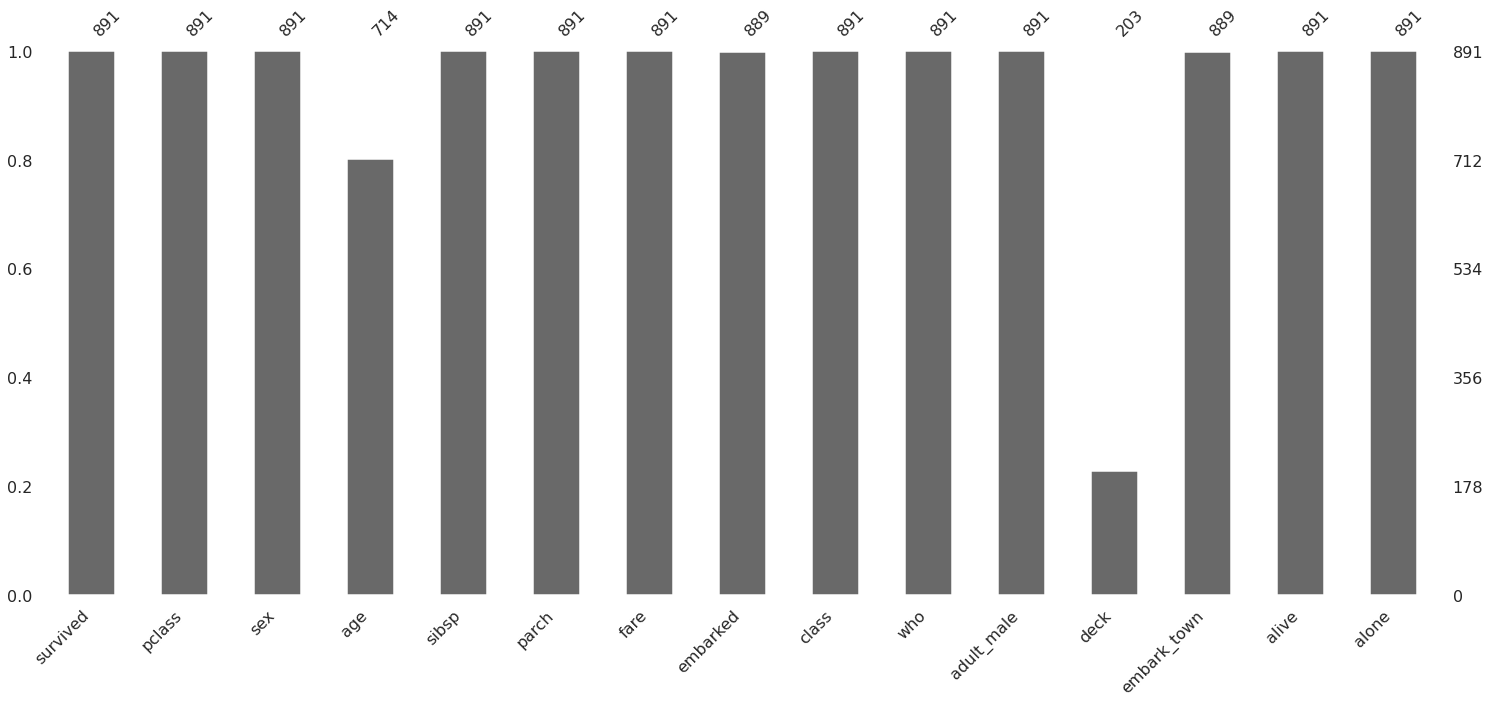

In [211]:
msno.bar(df);

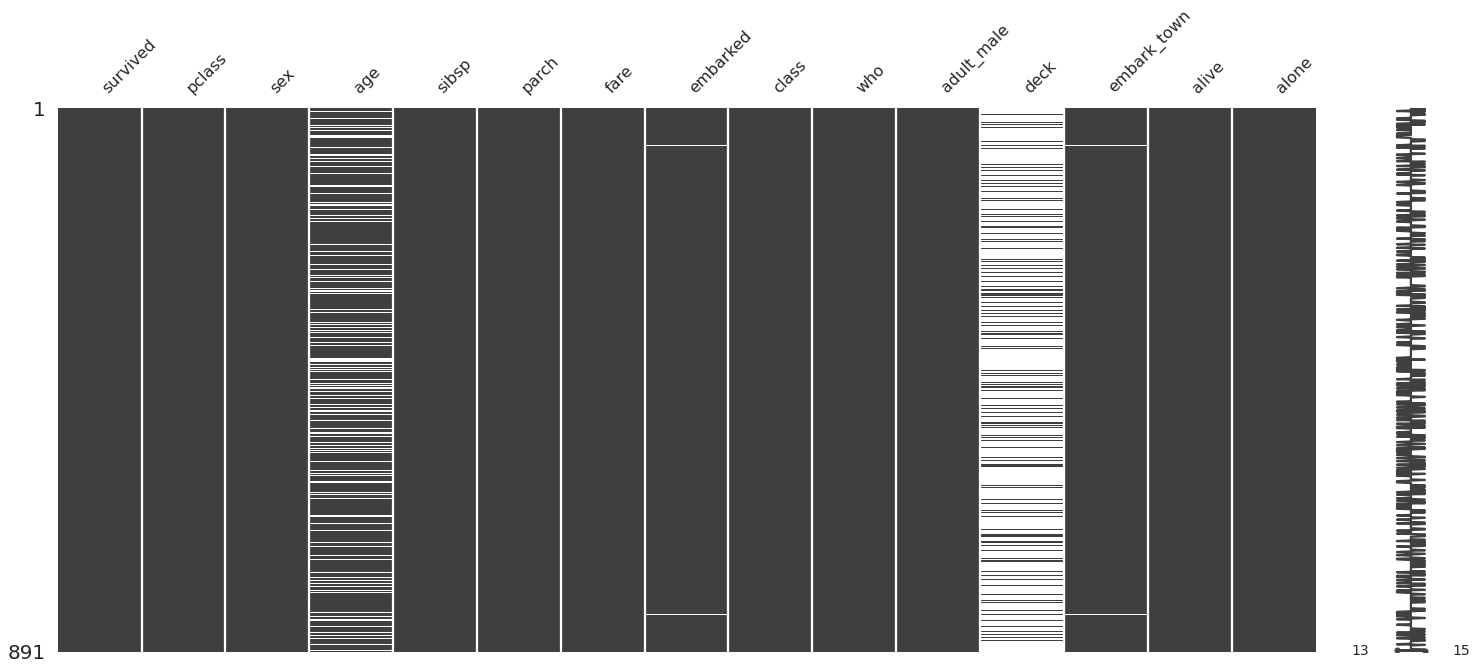

In [212]:
msno.matrix(df);

###Mostrando as linhas com valores faltantes como um todo:

In [213]:
df[df.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


##Mostrando as linhas com valores faltantes na coluna 'embarked':

In [214]:
df[df.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


##Removendo valores nulos

In [215]:
#Removendo coluna deck
df.drop(columns=['deck'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [216]:
#Valor máximo de NAs permitido
max_nan_freq = .7
# Identificando colunas
na_cols = df.isna().sum().div(len(df))
cols2drop = na_cols [na_cols>max_nan_freq].index
# Dropando colunas com muitos NAs
df.drop(columns=cols2drop)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [217]:
# Dropando colunas inplace
df.drop(columns=cols2drop, inplace=True)

In [218]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


##Imputando valores nulos

In [219]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


###Imputando valores nulos com média/mediana/moda:

In [220]:
df.fillna({'age':df.age.mean(), 'embarked':df.embarked.mode()[0]}).tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,Queenstown,no,True


### Imputando valores nulos com valores passados, futuros, ou via interpolação.

In [221]:
# O b é de back fill e ou f fill
(
  df
 .assign(
     age_bfill = df.age.bfill(),
     age_ffill = df.age.ffill(),
     age_interpolate = df.age.interpolate(),
 )
 .filter(like='age')
 .tail()
 .style.highlight_null('yellow')
)

,age,age_bfill,age_ffill,age_interpolate
886,27.000000,27.000000,27.000000,27.000000
887,19.000000,19.000000,19.000000,19.000000
888,nan,26.000000,19.000000,22.500000
889,26.000000,26.000000,26.000000,26.000000
890,32.000000,32.000000,32.000000,32.000000


In [222]:
# Imputando Nas por grupo
df.groupby('sex')['age'].apply(lambda x :x.fillna(x.mean()))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

#Tratamento de outliers

##Contexto teórico
Outliers são pontos muito distantes do centro de distribuição dos dados e impactam grande parte das análises e modelos de machine learning.

As causas de outlieres podem ser:

- Erro de mensuração/amostragem

- Outlier natural dos dados

Neste tópico aprenderemos como identificar e tratar outliers, que seja removendo-os ou aplicando transformação.

Cabe ressaltar que outliers naturais dos dados não devem ser removidos levianamente, ou seja, sem antes identificá-los e sem tentar entender seus motivos, se há padrões neste outliers. Uma vez identificado estes outliers e suas possíveis causas, e no caso de não haver problema/interesse em não considerá-los na análise, podemos removê-los.

##Prática
Para esta análise, vamos trabalhar com um dataset com vários atributos de vinhos.

In [223]:
df,_ = datasets.load_wine(return_X_y=True, as_frame=True)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


##Identificando/Removendo outliers

### A maneira mais direta (e simples) de observar um outlier é através do gráfico boxplot.

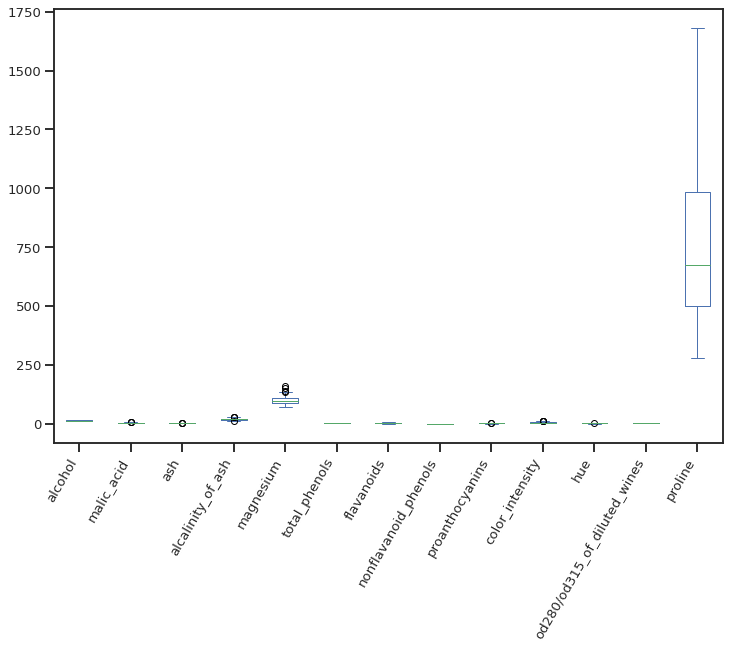

In [224]:
# Boxplot com dados "as is"
df.plot.box()
plt.xticks(rotation=60, ha='right');

Conseguimos observar que há outliers em algumas variáveis, mas devido à diferença de escala entre as variáveis, fica difícil compará-las em um único plot. 

Uma alternativa aqui seria plotar separadamente. Contudo, podemos optar também por padronizar estes dados apenas para visualização usando a função `scale` da importada da biblioteca `sklearn.preprocessing`:

In [225]:
from sklearn.preprocessing import scale

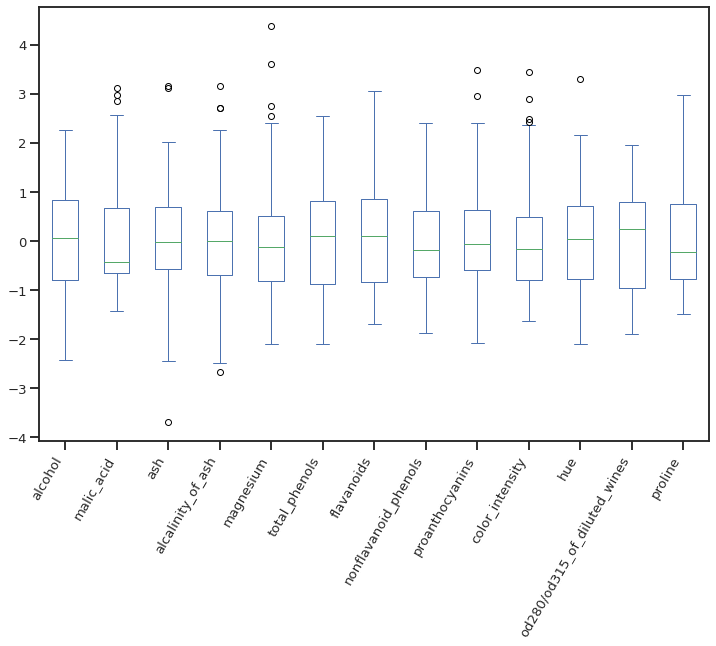

In [226]:
df.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');

Verificamos que existem outliers, logo, o próximo passo seria identificá-los para verificar se faz sentido ou não. Para isso, discutiríamos com o time de negócios (neste caso, um especialista em vinhos). 

Uma vez que este dataset está sendo utilizado para fins didáticos, vamos considerar inicialmente que podemos excluir estes dados, e mais adiante veremos alternativas para prosseguir com a análise mesmo com estes outliers.

#### Interquartile range

Podemos identificar os outliers pelo método interquartil, utilizando a seguinte fórmula:

$$
\text{lower_outlier} = Q1 - 1.5 \times IQR
$$
$$
\text{upper_outlier} = Q3 + 1.5 \times IQR
$$

onde $Q1$ represente o primeiro quartil, $Q3$ o terceiro, e $IQR$ o intervalo interquartil. 

Segue abaixo uma possível implementação desta fórmula:

#Explicando a função:

Ele pega um array no caso uma coluna no pandas e com essa coluna ele vai calcular os quantis o primeiro e o terceiro quartil.

Coloca um fator e uma maliabidade de 3 a 1.5, para identificar os limites superior e inferior para retornar um array boleano.

In [227]:
def is_outlier(array, extreme=False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1
  
  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

A função retorna um array booleano do mesmo tamanho do array de entrada, indicando se o valor é ou não um outlier:

In [228]:
# Mostrando aplicação da função em uma dada coluna (mostra os valores)
is_outlier (df.ash)

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: ash, Length: 178, dtype: bool

In [229]:
# Calculando quantidade de outliers (faz uma soma dos outliers dessa coluna)
is_outlier(df.ash).sum()

3

E podemos aplicá-la para uma ou mais colunas através do método apply:

In [230]:
# Mostrando aplicação da função para todas colunas numéricas contínuas
df.apply(is_outlier)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,True,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [231]:
# Calculando quantidade de outliers
df.apply(is_outlier).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Para remover os outliers, podemos ignorar todas linhas que tem pelo menos um True para outlier:

In [232]:
# Removendo outliers
df[~df.apply(is_outlier).any(axis=1)]
#essa função axispor padrãoé igual a zero que é por coluna, quando passa 1 ele fica por linha 
# E nesse caso ele pegou os que são outliers mas se eu quiser os que não são é só colocar um til dai ele nega a minha afirmação.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


E podemos comparar as distribuições com ou sem remoção de outlier:

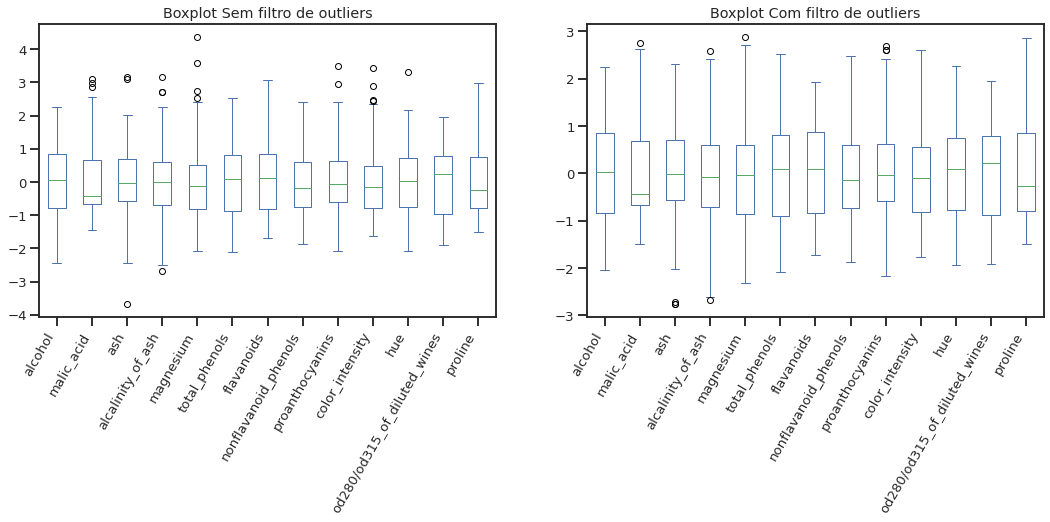

In [233]:
# Figura lado a lado dos dados originais e padronizados
#O subplots utiliza um grafico um do lado do outro.

df_without_outliers = df[~df.apply(is_outlier).any(axis=1)]

fig,axes = plt.subplots(ncols=2, figsize=(18,6)) # ncols (colunas) nrows (linha)

df.apply(scale).plot.box(ax=axes[0], title='Boxplot Sem filtro de outliers')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot Com filtro de outliers')

fig.autofmt_xdate(rotation=60, ha='right') #aqui é apenas para rodar o texto

plt.show()

Observe que, mesmo removendo os outliers, eles diminuem, mas não desapareceram! Por quê?

Ao adicionamos ou removemos valores acabamos modificando a distribuição dos dados, principalmente valores mais distantes do centro da distribuição. Por isso, a remoção de outliers não garante necessariamente que não terá mais outliers na nova distribuição. 

Neste caso, por exemplo, valores que previamente não eram outliers passaram a ser. Contudo, tais valores não estão tão distantes como os outliers originais.

In [234]:
df_without_outliers.apply(is_outlier).sum()
#Mesmo após tirar ele recalcula com novos outliers a partir dos dados que colocamos.
#E para não ficar repetitivo utilizamos o score para saber se os valores estão dentro dessa media.

alcohol                         0
malic_acid                      1
ash                             3
alcalinity_of_ash               2
magnesium                       1
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 3
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

####**Z-score**

Outro método para identificar e também remover outliers é através da padronização Z-score, em que a média dos valores fica em 0, e o desvio padrão em 1. Usualmente, filtramos valores acima e abaixo de 3 desvios padrões (para cima e para baixo, respectivamente).

Nós já utilizamos o Z-score

In [235]:
#Aqui ele fez uma formula onde ele faz uma normalizand vendo se o valor é menor que menos 3 ou maior.
def zscore_outlier(array):
  scaled_array = scale(array)
  return (scaled_array<-3) | (scaled_array>3)

df_without_outliers = df[~df.apply(zscore_outlier).any(axis=1)]

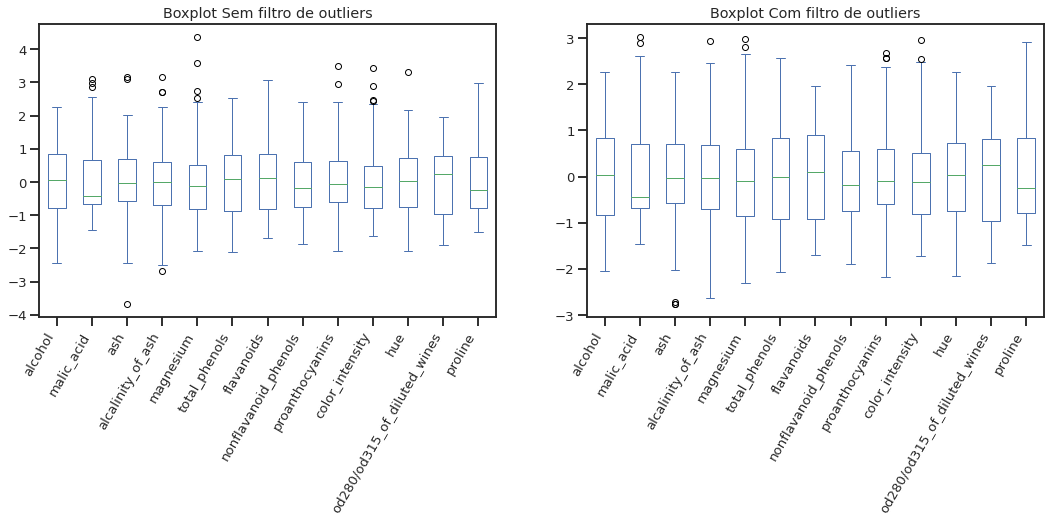

In [236]:
# Figura lado a lado dos dados originais e padronizados destacando 3 std
fig,axes = plt.subplots(ncols=2, figsize=(18,6)) # ncols (colunas) nrows (linha)

df.apply(scale).plot.box(ax=axes[0], title='Boxplot Sem filtro de outliers')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot Com filtro de outliers')

fig.autofmt_xdate(rotation=60, ha='right') #aqui é apenas para rodar o texto

plt.show()

##Corrigindo outliers

###Cap
Um método para lidar com os outliers é substituí-los por um valor que faça sentido, como, por exemplo, substituir todos os valores que são maior do queo percentil 99% (ou seja, top 1% dos valores) pelo valor do percentil 99%.

In [237]:
# Mostrando percentis
df.describe(percentiles=[.01,.25,.5,.75,.9,.99]) # Essa são as porcentagens

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000


In [238]:
#função para identificar um array recebendo o parametro minimo e maximo do percentil
#Fez um copy para nõ ficar inplace, e definindo o valor superior e inferior e por fim um filtro substituindo.
def cap_values(array, lower_quantile=0., upper_quantile=1.):
  array = array.copy()
  
  lower_quantile = np.quantile(array, lower_quantile)
  upper_quantile = np.quantile(array, upper_quantile)
  
  array[array<lower_quantile] = lower_quantile
  array[array>upper_quantile] = upper_quantile
  
  return array

In [239]:
# Mostrando percentis após aplicar função
cap_values(df.ash, upper_quantile=.90).max()
# Após pode ver que não existe valor maior que 2.7 que era o maximo que definimos.

2.7

In [240]:
df.apply(cap_values, upper_quantile=.90).describe(percentiles=[.01,.25,.5,.75,.9,.99])
#Agora os valores estão diferentes e a distribuição mudou um pouco também.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.979719,2.267213,2.354607,19.323596,98.629213,2.265236,1.993056,0.355225,1.549831,4.919775,0.947584,2.594090,735.573034
std,0.777324,0.967287,0.251381,2.997401,11.661305,0.576228,0.937301,0.112427,0.488657,2.017555,0.210867,0.684611,290.789642
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.980900,2.700000,24.000000,118.000000,3.027200,3.230900,0.530000,2.294500,8.509000,1.230900,3.451800,1260.450000
99%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000


##Transformações

###Log

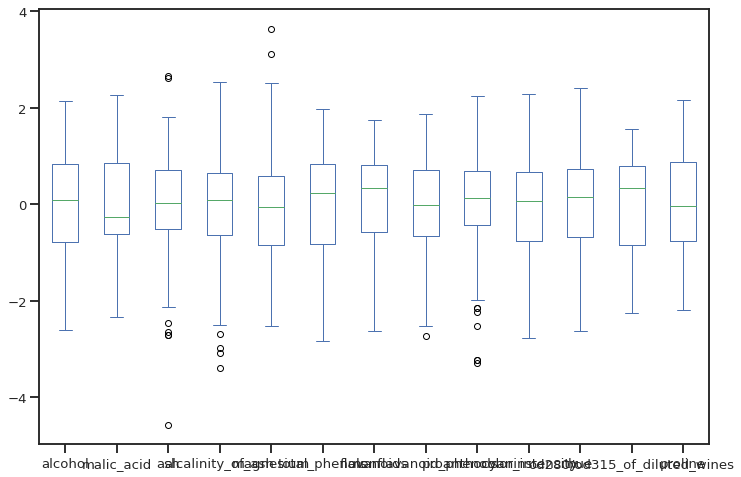

In [241]:
#Vai aplicar um log para todas as colunas.
#Depois ele aplicou um scale e plot box que é o grafico.
df.apply(np.log).apply(scale).plot.box()

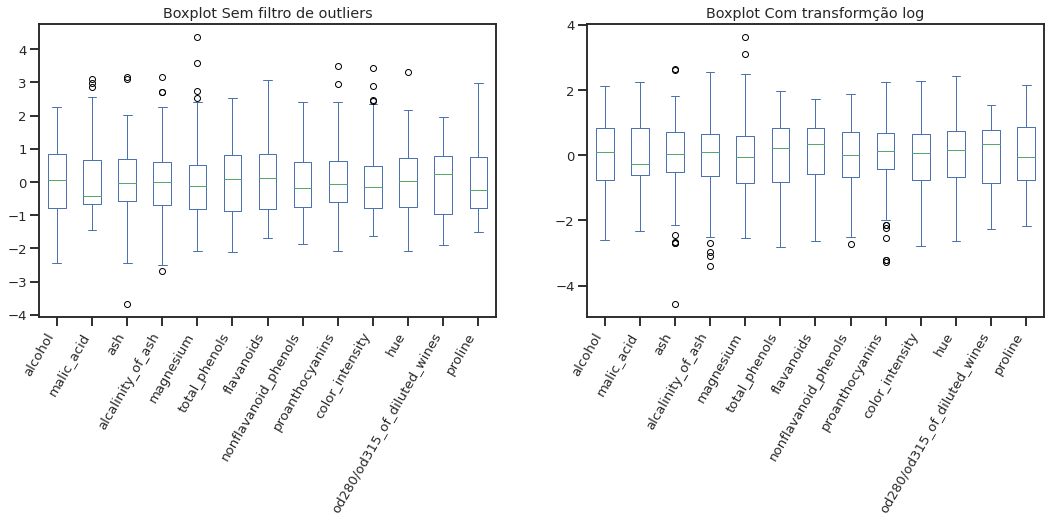

In [242]:
# Figura lado a lado dos dados originais e padronizados destacando 3 std
fig,axes = plt.subplots(ncols=2, figsize=(18,6)) # ncols (colunas) nrows (linha)

df.apply(scale).plot.box(ax=axes[0], title='Boxplot Sem filtro de outliers')
df.apply(np.log).apply(scale).plot.box(ax=axes[1], title='Boxplot Com transformção log')

fig.autofmt_xdate(rotation=60, ha='right') #aqui é apenas para rodar o texto

plt.show()

##Box-cox

In [243]:
from sklearn.preprocessing import power_transform

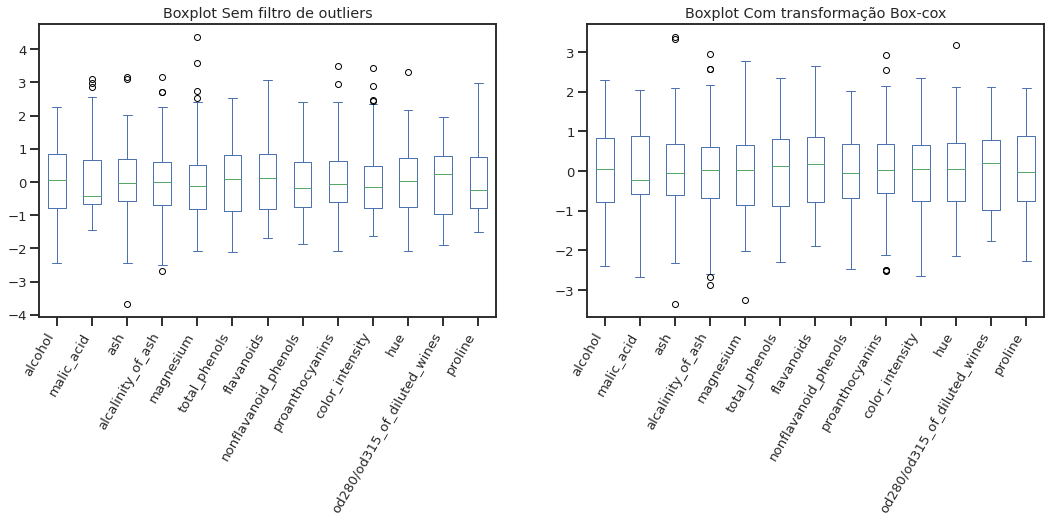

In [244]:
#power_transform(df[['ash']], method='box-cox')

df_boxbox = pd.DataFrame(power_transform(df, method='box-cox'), columns=df.columns)

fig,axes = plt.subplots(ncols=2, figsize=(18,6)) # ncols (colunas) nrows (linha)

df.apply(scale).plot.box(ax=axes[0], title='Boxplot Sem filtro de outliers')
df_boxbox.plot.box(ax=axes[1], title='Boxplot Com transformação Box-cox')

fig.autofmt_xdate(rotation=60, ha='right') #aqui é apenas para rodar o texto

plt.show()
#Ainda continua com outlier mas bem menos e ele funciona melhor que o log. E o desvio padrão de 3 para mais e para menos é bom.

##Tratamento de datas

Para que o Python/Pandas reconheça que estamos trabalhando com o tipo de dado no formato data (date ou datetime), precisamos especificar este formato, para que assim possamos usufruir das diversas funções que lidam com este tipo de dado.

Para mostrar como podemos fazer essa conversão em uma tabela, iremos utilizar como exemplo dados de acidentes aéreos, neste momento selecionando apenas as colunas de data, que por padrão é lida como texto, e das fatalidades:

In [245]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities']).dropna()
print(df.shape)
df.head()

(5256, 2)


,Date,Fatalities
0,09/17/1908,1.0
1,07/12/1912,5.0
2,08/06/1913,1.0
3,09/09/1913,14.0
4,10/17/1913,30.0


In [246]:
# Tipos de dados, ele mostra o tipo e dá para ver que não está no formato de data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5256 non-null   object 
 1   Fatalities  5256 non-null   float64
dtypes: float64(1), object(1)
memory usage: 123.2+ KB


Observe que o tipo data type da coluna Date é `object`, e não `datetime`.

Uma alternativa seria ler a tabela já especificando as colunas que são datas, e o pandas vai tentar inferir o formato da data:

In [247]:
# Formatando data automaticamente ao ler tabela
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'],parse_dates=['Date']).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


In [248]:
df.head()

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0


Outra opção é converter o data type das colunas que representam data:

In [249]:
# Podemos permitir que o pandas infira automaticamente o formato da data se possível (padrão do Pandas)
#pd.to_datetime(df.Date) #pode ser assim ou
#df['Date'].astype('datetime64[ns]') #desse modo pode selecionar mais de uma coluna colocando tudo dentro da lista.

In [250]:
# Especificando o formato (para dataset grande costuma ser inclusive mais rápido)
pd.to_datetime(df['Date'], format='%m/%d/%Y') #garante que não vai ter erro.

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [251]:
# Podemos permitir que o pandas infira automaticamente o formato da data se possível (padrão do Pandas)
# pd.to_datetime(df.Date)
df['Date'].astype('datetime64[ns]')

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [252]:
df.head(1)

,Date,Fatalities
0,1908-09-17,1.0


In [253]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


Observe que podemos permitir ou não que o pandas faça a inferência do formato da data, contudo, é uma boa prática que especifiquemos o formato sempre que possível. Inclusive, para um grande volume de dados a conversão com espefificação tende a ser mais rápida.

Todos os símbolos dos formatos podem ser encontrados [neste link da documentação oficial do Python](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

Uma vez que a coluna de data esteja no formato certo, podemos utilizar o método `dt` do Pandas para acessar muitas funcionalidades úteis das datas/horários. Vide conjunto de funcionalidades na [documentação oficial](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html).

In [254]:
# Mostrando todos atributos e funções acessíveis pelo método dt
#print(list_attributes(df['Date'].dt))

Podemos colocar a data como índice no dataframe, e com isso acessar ainda mais funcionalidades ([vide documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html)), como filtros mais efetivos e  agrupamentos inteligentes de períodos de tempo que será visto em conjunto com o `groupby` mais adiante.

In [255]:
# Adicionando a data como index e ordenando-as
df_index = df.set_index('Date').sort_index()
df_index

,Fatalities
Date,
1908-09-17,1.0
1912-07-12,5.0
1913-08-06,1.0
1913-09-09,14.0
1913-10-17,30.0
...,...
2009-05-20,98.0
2009-05-26,4.0
2009-06-01,228.0


In [256]:
# Filtrando do ano 2000 até o mês de maio de 2005.
df_index.loc['2000-05-10':'2003-08']

,Fatalities
Date,
2000-05-10,6.0
2000-05-17,3.0
2000-05-21,19.0
2000-05-25,1.0
2000-05-25,1.0
...,...
2003-08-04,2.0
2003-08-08,1.0
2003-08-20,20.0


In [257]:
# Agrupando por ano e somando as fatalidades, aqui ele considerou o mês e fez a soma.
#Posso utiliza também o S depois do mês MS (month start) então começando do mês X e pode ser feito com ano também YS
df_index.resample('MS').sum()

,Fatalities
Date,
1908-09-01,1.0
1908-10-01,0.0
1908-11-01,0.0
1908-12-01,0.0
1909-01-01,0.0
...,...
2009-02-01,102.0
2009-03-01,44.0
2009-04-01,65.0


#Rolling Filters

In [258]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').sum().sort_index()
df_monthly.head()

,Fatalities
Date,
1908-09-30,1.0
1908-10-31,0.0
1908-11-30,0.0
1908-12-31,0.0
1909-01-31,0.0


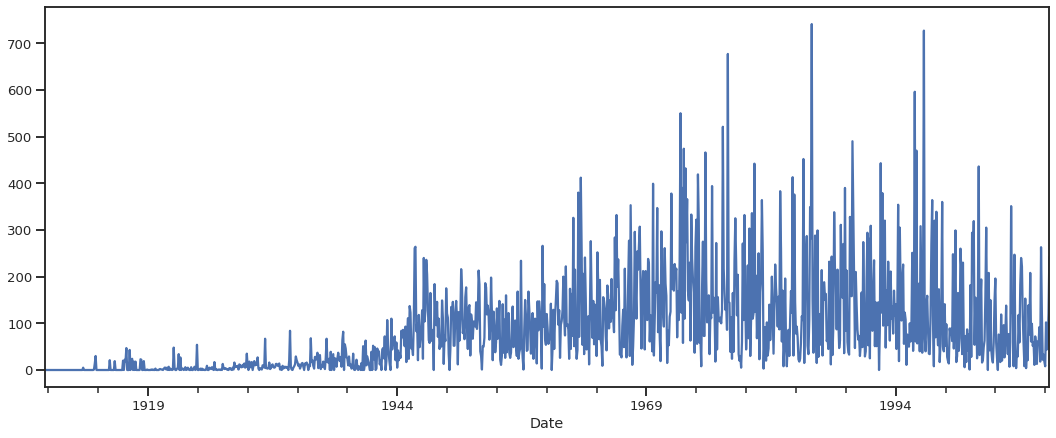

In [259]:
# Plot sem tratamento de ruídos com rolling filter
plt.figure(figsize=(18,7)) #aqui ele só aumentou o tamanho da figura deixando mais largo mais espaçado.
df_monthly.Fatalities.plot();

In [260]:
#Como que funciona a média movel. Ele retornou na (3) terceira linha a média dele mesmo com dois valores atrás.
df_monthly.rolling(3).mean()

,Fatalities
Date,
1908-09-30,NaN
1908-10-31,NaN
1908-11-30,0.333333
1908-12-31,0.000000
1909-01-31,0.000000
...,...
2009-02-28,42.666667
2009-03-31,51.333333
2009-04-30,70.333333


In [262]:
df_monthly.Fatalities.rolling(3).mean()

Date
1908-09-30           NaN
1908-10-31           NaN
1908-11-30      0.333333
1908-12-31      0.000000
1909-01-31      0.000000
                 ...    
2009-02-28     42.666667
2009-03-31     51.333333
2009-04-30     70.333333
2009-05-31     76.333333
2009-06-30    142.333333
Freq: M, Name: Fatalities, Length: 1210, dtype: float64

In [270]:
@interact(window_size=(12,121,12)) #cria uma janela de interação com os valores que determinei.
def rolling_mean(window_size):
# Média movel, plot sem tratamento de ruídos com rolling filter (interact)
  plt.figure(figsize=(18,7))
  df_monthly.Fatalities.rolling(window_size).mean().plot();
  plt.show()

interactive(children=(IntSlider(value=60, description='window_size', max=121, min=12, step=12), Output()), _do…

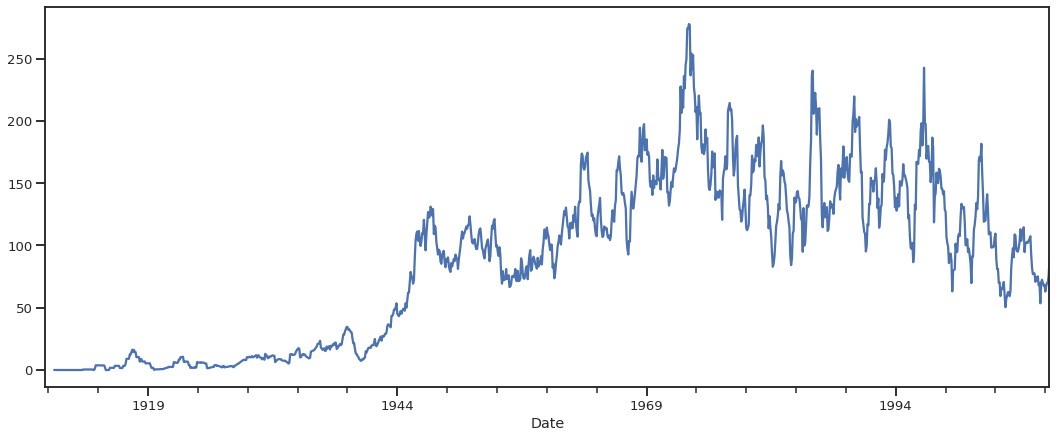

In [268]:
rolling_mean(12)